In [1]:
# Проверял, есть ли еще какое-то влияние случайности

# при перезапуске одной модели могут быть незначительные отличия в значениях тотал ревардв в запусках с авариями.

# сид работает нормально. Если заного инициализировать среду и задавать сид, или просто задавать сид и делать резет - результат одинаковый

# для модели обученной на коммите среды 3862ab3b6f6b169712ab07711c1368068e2509f5 сравнивал результаты запусков \
# на этом коммите и на ea3e81a7fb23ee9b4d8946170158772fd4755ce0. Результат практически одинаков. Иногда встречаются отличия +-1, совсем редко +-1.
# только для сравнения этих коммитов надо не забыть поменять множительв if self.finish_position_framestimer > self.frames_per_step * 20:

In [1]:
import sys
sys.path.append("/s/ls4/users/grartem/RL_robots/continuous-grid-arctic/")
sys.path.append("/s/ls4/users/grartem/RL_robots/RL_robotSim/")
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [2]:
os.chdir("/s/ls4/users/grartem/RL_robots/RL_robotSim/")

In [3]:
import time
import gym
import pyhocon
import numpy as np
import pandas as pd
import ray
from ray.rllib.agents.ppo.ppo import PPOTrainer
from ray.rllib.agents.ddpg.td3 import TD3Trainer

import MyMisc

/s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
configs = pyhocon.ConfigFactory.parse_file("/s/ls4/users/grartem/RL_robots/RL_robotSim/Configs/FollowerContinuous/PPO_obst.conf")
#CONFIG = configs["ppo_archv3"].as_plain_ordered_dict()
CONFIG = configs["ppo_env4feats12_train5v6"].as_plain_ordered_dict()
CONFIG["config"]["num_workers"]=1

# Chose checkpoint

In [5]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4/PPO/env4feats12_train/ppo_env4feats12_train5v6/PPO_continuous-grid_448ca_00002_2_2022-06-14_16-10-32/"
df= pd.read_csv(EXPERIMENT_DIR + "/progress.csv")
df = df.loc[list(range(0,800,10))]


df.sort_values(by=["episode_reward_max", "episode_reward_mean", "episode_reward_min"], ascending= False)
print("top max rewards")
print(df.sort_values(by=["episode_reward_max", "episode_reward_mean", "episode_reward_min"], ascending= False).index[:10])
df.sort_values(by=["episode_reward_mean", "episode_reward_max", "episode_reward_min"], ascending= False)
print("top mean rewards")
print(df.sort_values(by=["episode_reward_mean", "episode_reward_max", "episode_reward_min"], ascending= False).index[:10])
df.sort_values(by=[ "episode_reward_min","episode_reward_mean", "episode_reward_max"], ascending= False)
print("top min rewards")
print(df.sort_values(by=[ "episode_reward_min","episode_reward_mean", "episode_reward_max"], ascending= False).index[:10])

df["reward_sum"] = df.loc[:, ["episode_reward_min","episode_reward_mean", "episode_reward_max"]].sum(axis=1)
df.sort_values(by="reward_sum", ascending= False)

top max rewards
Int64Index([20, 30, 80, 700, 550, 540, 730, 490, 300, 290], dtype='int64')
top mean rewards
Int64Index([270, 520, 250, 500, 160, 450, 550, 300, 170, 340], dtype='int64')
top min rewards
Int64Index([500, 560, 540, 590, 740, 290, 620, 770, 180, 520], dtype='int64')


,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,timesteps_this_iter,agent_timesteps_total,done,...,info/learner/default_policy/learner_stats/cur_kl_coeff,info/learner/default_policy/learner_stats/cur_lr,info/learner/default_policy/learner_stats/total_loss,info/learner/default_policy/learner_stats/policy_loss,info/learner/default_policy/learner_stats/vf_loss,info/learner/default_policy/learner_stats/vf_explained_var,info/learner/default_policy/learner_stats/kl,info/learner/default_policy/learner_stats/entropy,info/learner/default_policy/learner_stats/entropy_coeff,reward_sum
540,963.0,123.0,526.895000,528.170000,19,4,5410000,0,5410000,False,...,0.320361,0.00005,550.270801,0.017346,550.249088,0.022007,0.013634,-4.453997,0.0,1612.895000
290,958.0,105.0,524.996000,531.780000,16,4,2910000,0,2910000,False,...,0.213574,0.00005,571.688027,0.010224,571.674828,0.050552,0.013928,-3.146311,0.0,1587.996000
590,940.0,118.0,514.180000,515.440000,20,4,5910000,0,5910000,False,...,0.320361,0.00005,549.507578,-0.021806,549.525639,0.118170,0.011693,-5.009162,0.0,1572.180000
500,877.0,151.0,536.665000,538.480000,18,4,5010000,0,5010000,False,...,0.320361,0.00005,536.901637,-0.016763,536.915147,-0.001768,0.010153,-4.054873,0.0,1564.665000
770,945.0,94.0,519.834000,524.180000,16,4,7710000,0,7710000,False,...,0.480542,0.00005,556.579102,-0.014029,556.588636,-0.052108,0.009351,-5.812718,0.0,1558.834000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,825.0,-33.0,492.999000,497.030000,19,4,1510000,0,1510000,False,...,0.012500,0.00005,554.131749,-0.024984,554.156641,-0.007622,0.007366,-0.587643,0.0,1284.999000
200,791.0,-8.0,497.462000,502.300000,18,4,2010000,0,2010000,False,...,0.012500,0.00005,604.169588,0.011751,604.157678,0.088169,0.012527,-1.778996,0.0,1280.462000
710,821.0,-30.0,480.575000,484.280000,17,4,7110000,0,7110000,False,...,0.480542,0.00005,519.578428,0.014134,519.556970,0.067247,0.015244,-5.465600,0.0,1271.575000
10,725.0,28.0,389.108000,411.750000,21,4,110000,0,110000,False,...,0.050000,0.00005,845.748773,-0.014273,845.762672,-0.045373,0.007448,2.466335,0.0,1142.108000


In [6]:
checkpoint_path = EXPERIMENT_DIR + "/checkpoint_000710/checkpoint-710"
table_save_path = EXPERIMENT_DIR + "/checkpoint-710_test_ntbk.csv"

In [7]:
trainer = ray.rllib.agents.registry.get_trainer_class(CONFIG["run"])(CONFIG["config"])
trainer.restore(checkpoint_path)

env = MyMisc.continuous_env_maker(config=CONFIG["config"]["env_config"])

(RolloutWorker pid=12088) pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
(RolloutWorker pid=12088) Hello from the pygame community. https://www.pygame.org/contribute.html


(RolloutWorker pid=12088) /s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/follow_the_leader_continuous_env.py:279: UserWarning: Одновременно заданы и random_frames_per_step и frames_per_step, будет использоваться random_frames_per_step
(RolloutWorker pid=12088)   warn(
(RolloutWorker pid=12088) /s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
(RolloutWorker pid=12088)   logger.warn(


(RolloutWorker pid=12088) ===Запуск симуляции номер 0===


(RolloutWorker pid=12088) Failed to create secure directory (/run/user/1556/pulse): No such file or directory
(RolloutWorker pid=12088) ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
(RolloutWorker pid=12088) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
(RolloutWorker pid=12088) ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
(RolloutWorker pid=12088) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
(RolloutWorker pid=12088) ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
(RolloutWorker pid=12088) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
(RolloutWorker pid=12088) ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
(RolloutWorker pid=12088) ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
2022-06-1

# collect test table

In [10]:
history = []
#for seed_i in range(100):
for seed_i in [7,12,13,14,16,17,18,20,27,30,32,35,47,48,49,50,
              52,58,64,65,73,74,75,76,77,78,80,81,82,85,86,88,90,93,94,95,96,97,98,99,
             101,103,104,105,109,112,113,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,132,135,138,141,143,144,145,147,149,150,
             152,153,154,155,157,159,160,161,162,163,166,168,170,172,175,176,179,182,183,188,192,194,195,196,197,198,199]:
#for seed_i in [1, 4, 5, 7 ,9, 10, 11, 14, 16, 17, 21, 24, 28, 29, 30, 32, 36, 38, 40, 43, 44, 45, 46, 49,
#             53, 58, 59, 60, 62, 63, 64, 65, 66, 70, 72, 73, 76, 82, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100,
#             103, 105, 107, 108, 109, 116,117, 119, 121,124, 127, 129, 131, 132, 138, 139, 140, 141, 146, 149, 150,
#             152, 153, 154, 155, 156, 159, 160, 161, 166, 170, 172, 173, 174, 175, 176, 177, 179, 181, 182, 183, 185, 186,
#             187, 189, 192, 194, 195, 196, 197, 198, 199]:
    
    print(seed_i)
    env.seed(seed_i)
    obs = env.reset()
    done = False
    total_reward = 0.0
    # Play one episode.
    start_time = time.time()
    steps_counter = 0
    while not done:
        # Compute a single action, given the current observation
        # from the environment.
        action = trainer.compute_single_action(obs, explore=False)
        # Apply the computed action in the environment.
        obs, reward, done, info = env.step(action)
        # Sum up rewards for reporting purposes.
        total_reward += reward
        steps_counter += 1
    elapsed_time = time.time() - start_time
    elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
    print(elapsed_time)
    history.append({
        "seed": seed_i,
        "reward": total_reward,
        "done": done,
        "time": elapsed_time,
        "steps": steps_counter
    })
    history[-1].update(info)
    pd.DataFrame(history).to_csv(table_save_path, index=False, sep=";", encoding="cp1251")
    # Report results.

7
===Запуск симуляции номер 0===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:17
12
===Запуск симуляции номер 1===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:53
13
===Запуск симуляции номер 2===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:15
14
===Запуск симуляции номер 3===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:26
16
===Запуск симуляции номер 4===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:16
17
===Запуск симуляции номер 5===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:57
18
===Запуск симуляции номер 6===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
00:00:15
20
===Запуск симуляции номер 7===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:50
27
===Запуск симуляции номер 8===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:28
30
===Запуск симуляции номер 9===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:01:03
32
===Запуск симуляции номер 10===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:54
35
===Запуск симуляции номер 11===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:22
47
===Запуск симуляции номер 12===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
00:00:19
48
===Запуск симуляции номер 13===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:14
49
===Запуск симуляции номер 14===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:13
50
===Запуск симуляции номер 15===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:57
52
===Запуск симуляции номер 16===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:10
58
===Запуск симуляции номер 17===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:14
64
===Запуск симуляции номер 18===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:54
65
===Запуск симуляции номер 19===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))


АВАРИЯ! -10.0
00:00:29
73
===Запуск симуляции номер 20===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:25
74
===Запуск симуляции номер 21===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:25
75
===Запуск симуляции номер 22===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:26
76
===Запуск симуляции номер 23===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:56
77
===Запуск симуляции номер 24===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:54
78
===Запуск симуляции номер 25===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:25
80
===Запуск симуляции номер 26===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:24
81
===Запуск симуляции номер 27===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
00:00:33
82
===Запуск симуляции номер 28===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:56
85
===Запуск симуляции номер 29===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:54
86
===Запуск симуляции номер 30===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:11
88
===Запуск симуляции номер 31===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:33
90
===Запуск симуляции номер 32===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:11
93
===Запуск симуляции номер 33===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:29
94
===Запуск симуляции номер 34===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:54
95
===Запуск симуляции номер 35===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:26
96
===Запуск симуляции номер 36===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:14
97
===Запуск симуляции номер 37===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:39
98
===Запуск симуляции номер 38===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:25
99
===Запуск симуляции номер 39===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:50
101
===Запуск симуляции номер 40===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:25
103
===Запуск симуляции номер 41===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:39
104
===Запуск симуляции номер 42===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:21
105
===Запуск симуляции номер 43===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


Лидер столкнулся с препятствием!
АВАРИЯ! -10.0
Лидер столкнулся с препятствием!
АВАРИЯ! -10.0
00:00:14
109
===Запуск симуляции номер 44===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:13
112
===Запуск симуляции номер 45===


/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:48
113
===Запуск симуляции номер 46===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:33
115
===Запуск симуляции номер 47===


/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:15
116
===Запуск симуляции номер 48===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:12
117
===Запуск симуляции номер 49===


/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:13
118
===Запуск симуляции номер 50===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:48
119
===Запуск симуляции номер 51===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:22
120
===Запуск симуляции номер 52===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:49
121
===Запуск симуляции номер 53===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:55
122
===Запуск симуляции номер 54===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:30
123
===Запуск симуляции номер 55===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:26
125
===Запуск симуляции номер 56===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:48
126
===Запуск симуляции номер 57===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:13
127
===Запуск симуляции номер 58===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
00:00:20
128
===Запуск симуляции номер 59===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:15
129
===Запуск симуляции номер 60===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:47
130
===Запуск симуляции номер 61===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:42
131
===Запуск симуляции номер 62===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:21
132
===Запуск симуляции номер 63===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
00:00:23
135
===Запуск симуляции номер 64===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))


АВАРИЯ! -10.0
00:00:16
138
===Запуск симуляции номер 65===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:49
141
===Запуск симуляции номер 66===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:46
143
===Запуск симуляции номер 67===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:16
144
===Запуск симуляции номер 68===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:28
145
===Запуск симуляции номер 69===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:13
147
===Запуск симуляции номер 70===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:14
149
===Запуск симуляции номер 71===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:15
150
===Запуск симуляции номер 72===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:48
152
===Запуск симуляции номер 73===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:20
153
===Запуск симуляции номер 74===


/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:25
154
===Запуск симуляции номер 75===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:15
155
===Запуск симуляции номер 76===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:48
157
===Запуск симуляции номер 77===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
00:00:35
159
===Запуск симуляции номер 78===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:45
160
===Запуск симуляции номер 79===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:26
161
===Запуск симуляции номер 80===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:53
162
===Запуск симуляции номер 81===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:13
163
===Запуск симуляции номер 82===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:51
166
===Запуск симуляции номер 83===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:21
168
===Запуск симуляции номер 84===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:51
170
===Запуск симуляции номер 85===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:38
172
===Запуск симуляции номер 86===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:39
175
===Запуск симуляции номер 87===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:23
176
===Запуск симуляции номер 88===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:16
179
===Запуск симуляции номер 89===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:16
182
===Запуск симуляции номер 90===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:13
183
===Запуск симуляции номер 91===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:53
188
===Запуск симуляции номер 92===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:17
192
===Запуск симуляции номер 93===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:26
194
===Запуск симуляции номер 94===


/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:12
195
===Запуск симуляции номер 95===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:26
196
===Запуск симуляции номер 96===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:29
197
===Запуск симуляции номер 97===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:22
198
===Запуск симуляции номер 98===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/utils/misc.py:63: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(v.dot(w) / (np.linalg.norm(v, axis=1) * np.linalg.norm(w)))
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
00:00:12
199
===Запуск симуляции номер 99===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


00:00:59


# analyze test table

In [62]:
EXPERIMENT_DIR

'/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/feats10v7_train/ppo_env7feats10v7_train5v2/PPO_continuous-grid_dd8f1_00002_2_2022-05-31_15-26-54/'

In [11]:
df_1 = pd.read_csv(EXPERIMENT_DIR + "/checkpoint-690_test_env4ntbk.csv", sep=";", encoding="cp1251")
print("total of success or finished by time", len(df_1[df_1["mission_status"].isin(["success", "finished_by_time"])]))
print("total of too far or low reward stops", len(df_1[df_1["agent_status"].isin(["too_far_from_leader", "low_reward"])]))
print("total follower crash", len(df_1[df_1["agent_status"].isin(["crash"])]))
print("total of leader finished", len(df_1[df_1["leader_status"].isin(["finished"])]))
print("sum of rewards", df_1["reward"].sum())
if "steps" in df_1.columns:
    print("steps", df_1["steps"].sum())
print("sum time", pd.to_timedelta(df_1["time"]).sum())

total of success or finished by time 26
total of too far or low reward stops 34
total follower crash 36
total of leader finished 26
sum of rewards 36249.600000000006
steps 40206
sum time 0 days 00:50:37


In [63]:
df_1 = pd.read_csv(EXPERIMENT_DIR + "/checkpoint-690_test_env4ntbk.csv", sep=";", encoding="cp1251")
print("total of success or finished by time", len(df_1[df_1["mission_status"].isin(["success", "finished_by_time"])]))
print("total of too far or low reward stops", len(df_1[df_1["agent_status"].isin(["too_far_from_leader", "low_reward"])]))
print("total follower crash", len(df_1[df_1["agent_status"].isin(["crash"])]))
print("total of leader finished", len(df_1[df_1["leader_status"].isin(["finished"])]))
print("sum of rewards", df_1["reward"].sum())
if "steps" in df_1.columns:
    print("steps", df_1["steps"].sum())
print("sum time", pd.to_timedelta(df_1["time"]).sum())

total of success or finished by time 25
total of too far or low reward stops 36
total follower crash 36
total of leader finished 25
sum of rewards 36356.70000000001
steps 40240
sum time 0 days 00:48:34


In [9]:
df_1 = pd.read_csv(EXPERIMENT_DIR + "/checkpoint-690_test_env4_2.csv", sep=";", encoding="cp1251")
print("total of success or finished by time", len(df_1[df_1["mission_status"].isin(["success", "finished_by_time"])]))
print("total of too far or low reward stops", len(df_1[df_1["agent_status"].isin(["too_far_from_leader", "low_reward"])]))
print("total follower crash", len(df_1[df_1["agent_status"].isin(["crash"])]))
print("total of leader finished", len(df_1[df_1["leader_status"].isin(["finished"])]))
print("sum of rewards", df_1["reward"].sum())
print("sum time", pd.to_timedelta(df_1["time"]).sum())

total of success or finished by time 30
total of too far or low reward stops 33
total follower crash 34
total of leader finished 31
sum of rewards 39951.500000000015
sum time 0 days 00:54:27


In [ ]:
df_1 = pd.read_csv("/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env7/PPO/feats2v2_train/ppo_env7feats9v3_train5v2/PPO_continuous-grid_dd8f1_00001_1_2022-05-31_15-26-34/checkpoint-570_test_env4_2.csv", sep=";", encoding="cp1251")
print("total of success or finished by time", len(df_1[df_1["mission_status"].isin(["success", "finished_by_time"])]))
print("total of too far or low reward stops", len(df_1[df_1["agent_status"].isin(["too_far_from_leader", "low_reward"])]))
print("total follower crash", len(df_1[df_1["agent_status"].isin(["crash"])]))
print("total of leader finished", len(df_1[df_1["leader_status"].isin(["finished"])]))
print("sum of rewards", df_1["reward"].sum())
print("sum time", pd.to_timedelta(df_1["time"]).sum())

# record some videos

In [12]:
monitor_env = gym.wrappers.Monitor(env=env,
                                directory= os.path.dirname(checkpoint_path)+"/videos_2",
                               video_callable=lambda _:True,
                               force=False,
                              uid="seeds_test", mode="evaluation")
history = []
#for seed_i in [9, 35, 36, 38, 44, 47, 59, 89, 91, 97]:
#for seed_i in [15, 83, 90]:
#for seed_i in [0, 2, 5, 9, 14, 22, 25, 28, 32, 34,36,  38, 42, 47, 52, 54, 58, 61, 62, 64, 75,78, 81, 88,  93, 95]:
for repeat in range(1):
    for seed_i in [7,12,13,14,16,17,18,20,27,30,32,35,47,48,49,50,
              52,58,64,65,73,74,75,76,77,78,80,81,82,85,86,88,90,93,94,95,96,97,98,99,
             101,103,104,105,109,112,113,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,132,135,138,141,143,144,145,147,149,150,
             152,153,154,155,157,159,160,161,162,163,166,168,170,172,175,176,179,182,183,188,192,194,195,196,197,198,199]:
        monitor_env.seed(seed_i)
        obs = monitor_env.reset()
        done = False
        total_reward = 0.0
        # Play one episode.
        start_time = time.time()
        steps_count = 0
        while not done:
            # Compute a single action, given the current observation
            # from the environment.
            action = trainer.compute_single_action(obs, explore=False)
            # Apply the computed action in the environment.
            obs, reward, done, info = monitor_env.step(action)
            # Sum up rewards for reporting purposes.
            total_reward += reward
            steps_count += 1
        elapsed_time = time.time() - start_time
        elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
        history.append({
        "repeat": repeat,
        "seed_i": seed_i,
        "reward": total_reward,
        "done": done,
        "time": elapsed_time,
        "steps_count": steps_count
        })
        history[-1].update(info)
        pd.DataFrame(history).to_csv(table_save_path+"_wvideo.csv", index=False, sep=";", encoding="cp1251")
historyDF_2 = pd.DataFrame(history)
obs = monitor_env.reset()

===Запуск симуляции номер 3===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 4===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 5===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 6===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 7===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 8===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 9===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 10===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 11===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 12===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 13===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 14===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 15===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 16===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 17===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 18===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 19===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 20===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 21===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 22===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 23===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 24===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 25===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 26===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 27===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 28===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 29===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 30===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 31===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 32===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 33===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 34===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 35===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 36===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 37===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 38===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 39===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 40===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 41===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 42===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 43===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 44===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 45===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 46===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 47===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 48===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 49===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 50===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 51===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 52===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 53===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 54===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 55===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 56===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 57===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 58===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 59===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 60===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 61===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 62===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 63===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 64===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 65===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 66===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 67===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 68===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 69===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 70===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


Лидер столкнулся с препятствием!
Лидер столкнулся с препятствием!
Лидер столкнулся с препятствием!
Лидер столкнулся с препятствием!
Лидер столкнулся с препятствием!
Лидер столкнулся с препятствием!
===Запуск симуляции номер 71===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 72===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 73===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 74===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 75===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 76===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 77===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 78===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 79===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 80===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 81===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 82===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 83===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 84===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 85===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 86===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 87===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 88===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 89===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 90===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 91===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 92===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 93===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 94===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 95===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 96===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 97===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 98===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 99===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 100===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 101===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 102===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 103===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


In [11]:
info

{'mission_status': 'success',
 'agent_status': 'finished',
 'leader_status': 'finished'}

In [17]:
print(EXPERIMENT_DIR)

/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/obst_dynLSpd_dynFPS/PPO/env4feats10v7_train/ppo_env4feats10v7_train5v2/PPO_continuous-grid_0a7bf_00000_0_2022-04-12_15-49-50/


===Запуск симуляции номер 1===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


===Запуск симуляции номер 100===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


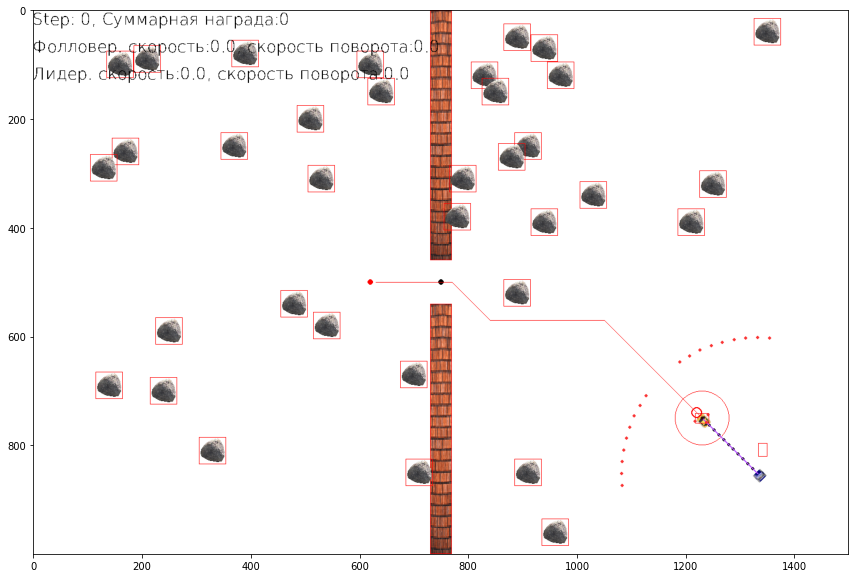

In [65]:
env.seed(11)
obs = env.reset()
import pygame
import matplotlib.pyplot as plt
%matplotlib inline
env.render()
plt.figure(figsize=(15,10))
plt.imshow(pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

===Запуск симуляции номер 19===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


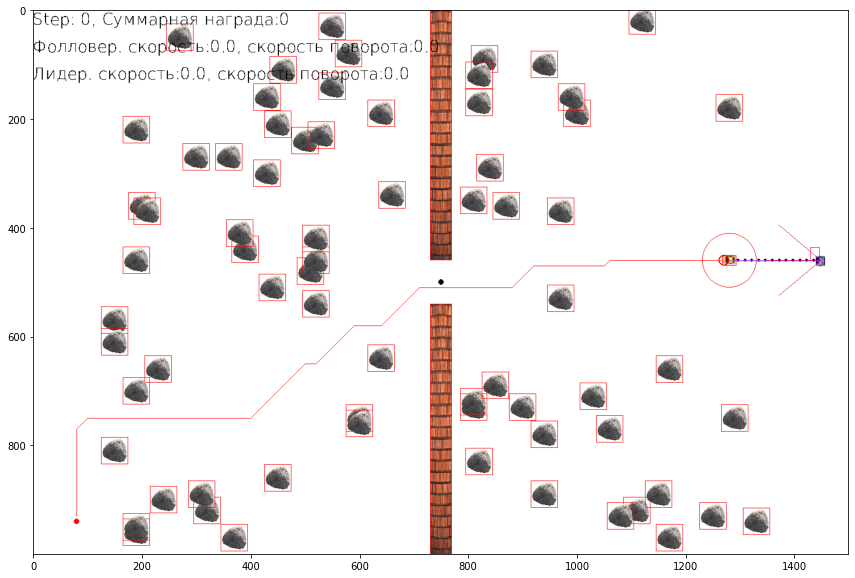

In [46]:
env.seed(17)
obs = env.reset()
import pygame
import matplotlib.pyplot as plt
%matplotlib inline
env.render()
plt.figure(figsize=(15,10))
plt.imshow(pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))